In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('sales_data.csv')
df.dropna(inplace=True)

In [3]:
drop_columns = ['id','order_id','customer_name','country','product_name','product_id','customer_id','ship_date']
df.drop(columns=drop_columns, inplace=True)

In [4]:
df.columns

Index(['order_date', 'ship_mode', 'segment', 'city', 'state', 'postal_code',
       'region', 'category', 'sub_category', 'sales'],
      dtype='object')

In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
labels_to_encode = ['ship_mode','segment','city','state','region','category','sub_category']

for column in labels_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

df.describe()

,ship_mode,segment,city,state,postal_code,region,category,sub_category,sales
count,9789.000000,9789.000000,9789.000000,9789.000000,9789.000000,9789.000000,9789.000000,9789.000000,9789.000000
mean,2.235877,0.657677,279.240474,22.313617,55273.322403,1.572173,0.972827,7.590969,230.116193
std,1.100134,0.762706,138.308727,15.387228,32041.223413,1.162618,0.629506,5.052061,625.302079
min,0.000000,0.000000,0.000000,0.000000,1040.000000,0.000000,0.000000,0.000000,0.444000
25%,2.000000,0.000000,165.000000,4.000000,23223.000000,1.000000,1.000000,3.000000,17.248000
50%,3.000000,0.000000,293.000000,27.000000,58103.000000,1.000000,1.000000,9.000000,54.384000
75%,3.000000,1.000000,393.000000,36.000000,90008.000000,3.000000,1.000000,12.000000,210.392000
max,3.000000,2.000000,528.000000,47.000000,99301.000000,3.000000,2.000000,16.000000,22638.480000


In [6]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [7]:
dfcopy = df.copy()

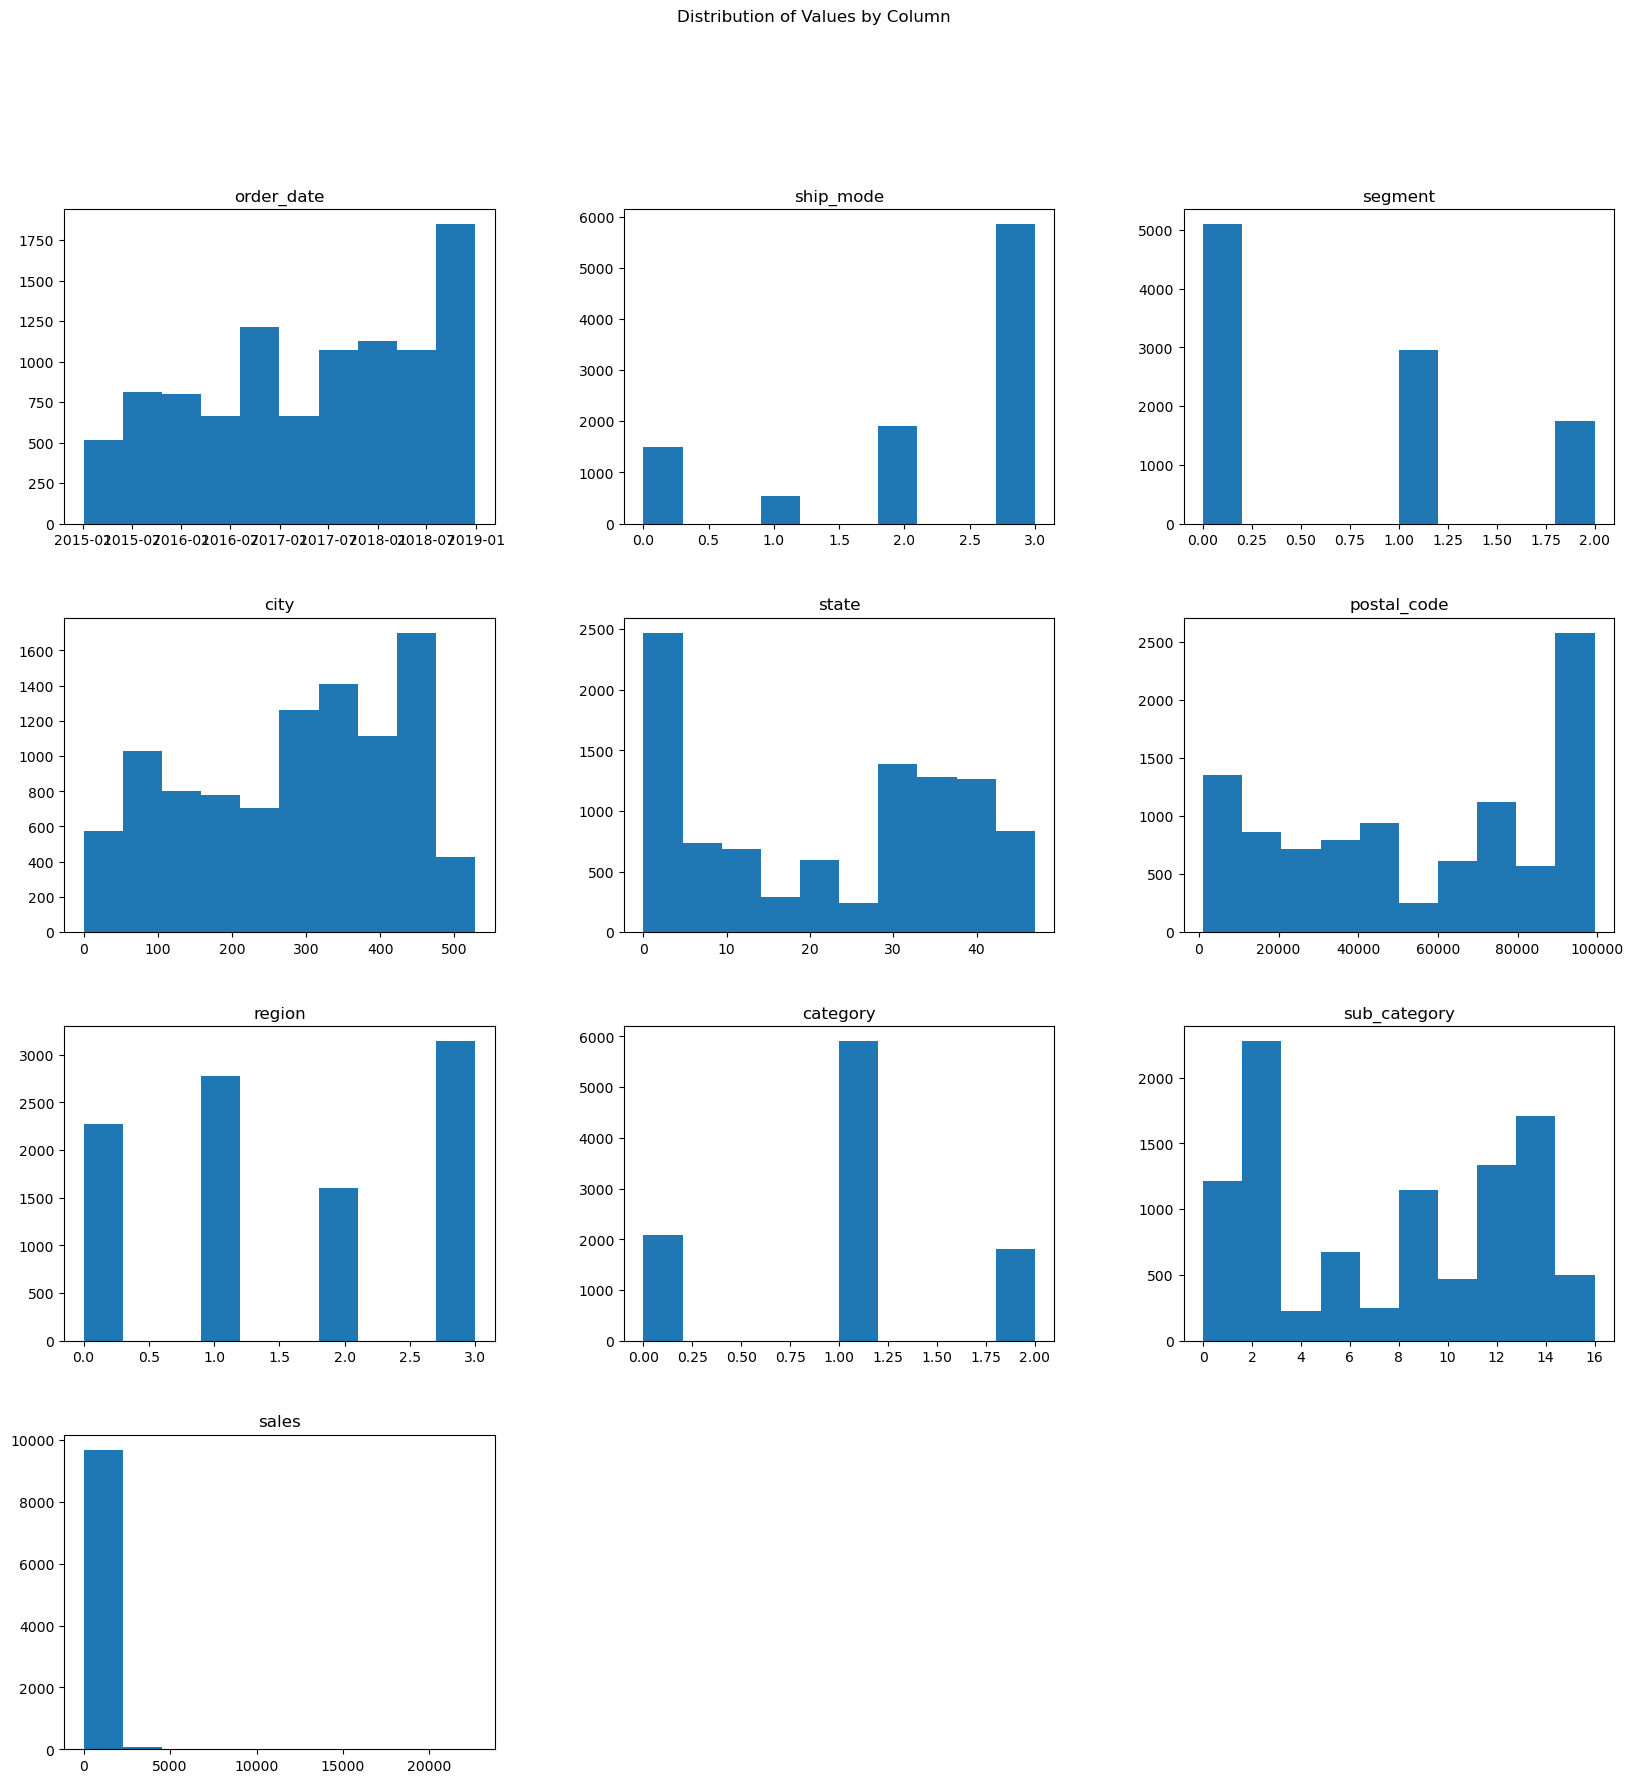

In [8]:
df.hist(bins=10, figsize=(20, 20), grid=False)
plt.suptitle('Distribution of Values by Column')
plt.show()

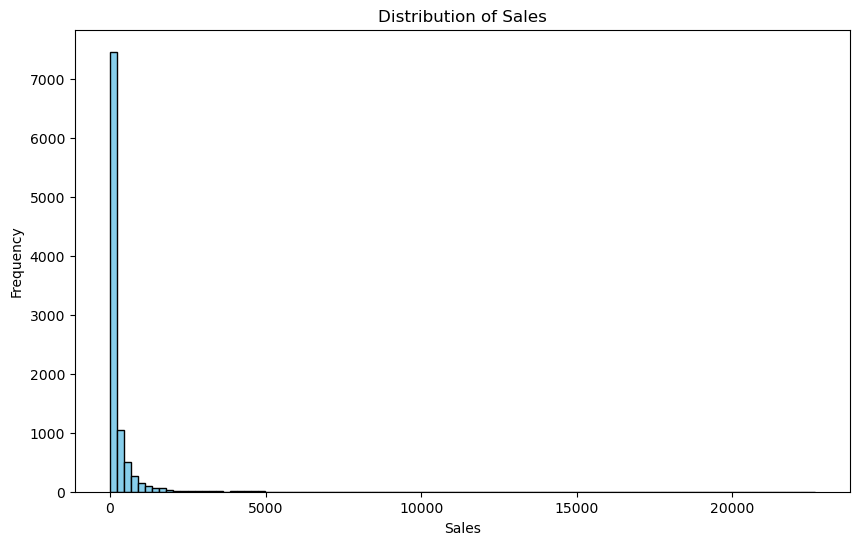

Value of the first bin: 7456.0


In [9]:
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df['sales'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Extract the value of the first bin on the x-axis
first_bin_value = n[0]
print("Value of the first bin:", first_bin_value)

In [10]:
category_ranges = [0, 227, 1500, np.inf]

# Categorize the values of the 'sales' column into numerical categories
df['sales'] = pd.cut(df['sales'], bins=category_ranges, labels=False, right=False)


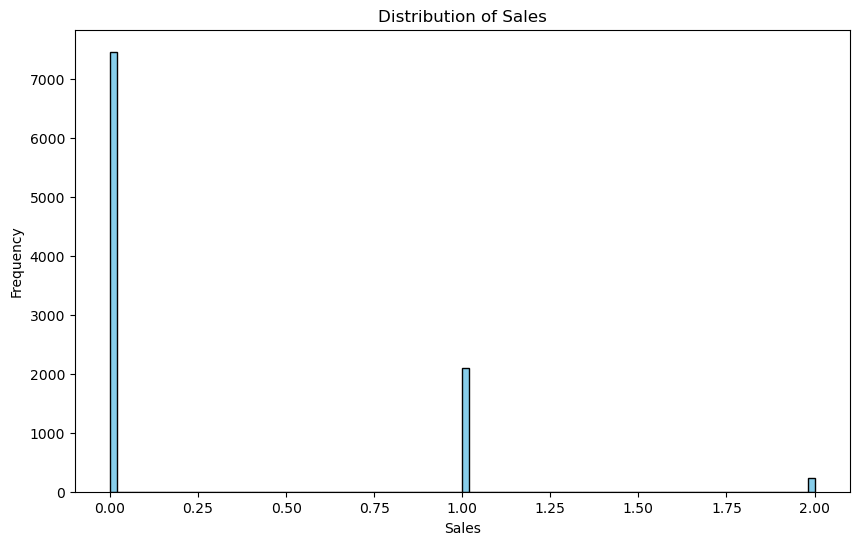

Value of the first bin: 7456.0


In [11]:
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df['sales'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Extract the value of the first bin on the x-axis
first_bin_value = n[0]
print("Value of the first bin:", first_bin_value)

In [12]:
df['order_date'] = (df['order_date'].astype('int64') // 10**9)

In [13]:
from sklearn.preprocessing import StandardScaler

# Assuming your dataframe is named df
# Extract the 'sales' column
sales_data = df['sales'].values.reshape(-1, 1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the sales data
scaled_sales = scaler.fit_transform(sales_data)

# Replace the 'sales' column with the standardized values
df['sales'] = scaled_sales

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_date    9789 non-null   int64  
 1   ship_mode     9789 non-null   int32  
 2   segment       9789 non-null   int32  
 3   city          9789 non-null   int32  
 4   state         9789 non-null   int32  
 5   postal_code   9789 non-null   float64
 6   region        9789 non-null   int32  
 7   category      9789 non-null   int32  
 8   sub_category  9789 non-null   int32  
 9   sales         9789 non-null   float64
dtypes: float64(2), int32(7), int64(1)
memory usage: 573.6 KB


In [15]:
#features = df[['order_date', 'ship_date', 'ship_mode', 'segment', 'city', 'state', 'postal_code', 'region', 'product_id', 'category', 'sub_category', 'sales']]
features = df[df.columns.tolist()]
# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
df[df.columns.tolist()] = scaled_features 

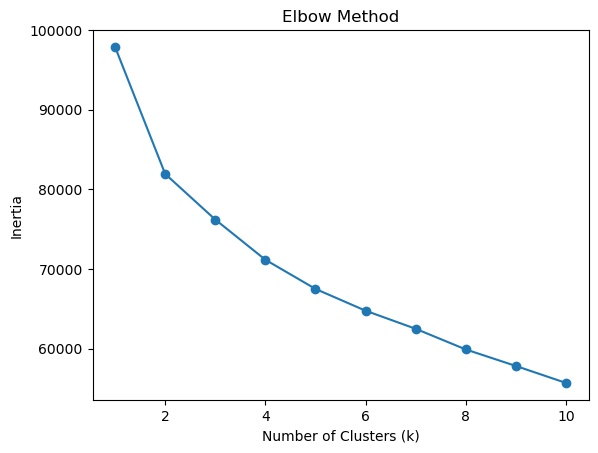

In [16]:
from sklearn.cluster import KMeans
X = df[df.columns]

# If your data needs preprocessing (e.g., handling missing values, scaling), do it here.

# Determine the optimal number of clusters (k) using the elbow method
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,n_init=10, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [17]:
dfCopy = df.copy()

In [18]:
df = dfCopy.copy()

df.drop(['postal_code','region','city','state'],axis=1,inplace=True)

In [19]:
#features = df[['order_date', 'ship_date', 'ship_mode', 'segment', 'city', 'state', 'postal_code', 'region', 'product_id', 'category', 'sub_category', 'sales']]
features = df[df.columns.tolist()]
# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
df[df.columns.tolist()] = scaled_features 

In [20]:
# Choose the number of clusters (k)
k = 3
# Apply KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster_label'] = kmeans.fit_predict(scaled_features)

y_kmeans = df['cluster_label']

cluster_distribution = df['cluster_label'].value_counts()
print(cluster_distribution)

C:\Users\luka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster_label
1    4587
2    3223
0    1979
Name: count, dtype: int64


In [21]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score


# Compute Silhouette Score - similar an object is to its own cluster compared to other clusters
silhouette_avg = silhouette_score(scaled_features, y_kmeans)
print("The average silhouette score is:", silhouette_avg)

#Davies bouldin index -"separation" between clusters.
db_index = davies_bouldin_score(scaled_features, y_kmeans)
print("Davies-Bouldin Index:", db_index)

# Calculate inertia - average distance between all pairs of points in the same cluster.
intra_cluster_distance = kmeans.inertia_
print("Intra-cluster distance (inertia):", intra_cluster_distance)


The average silhouette score is: 0.16689780928380019
Davies-Bouldin Index: 1.9826461465566734
Intra-cluster distance (inertia): 43934.64825629268


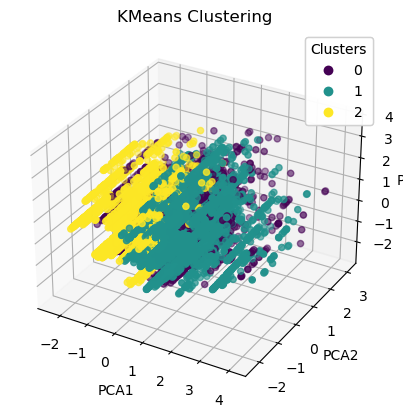

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

dfCopyPCA = df.copy()

pca = PCA(n_components=3)
reduced_features = pca.fit_transform(scaled_features)

# Add the cluster information to the DataFrame
dfCopyPCA['PCA1'] = reduced_features[:, 0]
dfCopyPCA['PCA2'] = reduced_features[:, 1]
dfCopyPCA['PCA3'] = reduced_features[:, 2]

# Plot clusters in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(dfCopyPCA['PCA1'], dfCopyPCA['PCA2'], dfCopyPCA['PCA3'], c=df['cluster_label'], cmap='viridis')
plt.title('KMeans Clustering')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

# Add a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

In [23]:
# Compute Silhouette Score - similar an object is to its own cluster compared to other clusters
silhouette_avg = silhouette_score(scaled_features, y_kmeans)
print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.16689780928380019


order_date     -0.000000
ship_mode       0.417014
segment        -0.000000
category        0.000000
sub_category   -0.240557
sales          -0.000000
dtype: float64


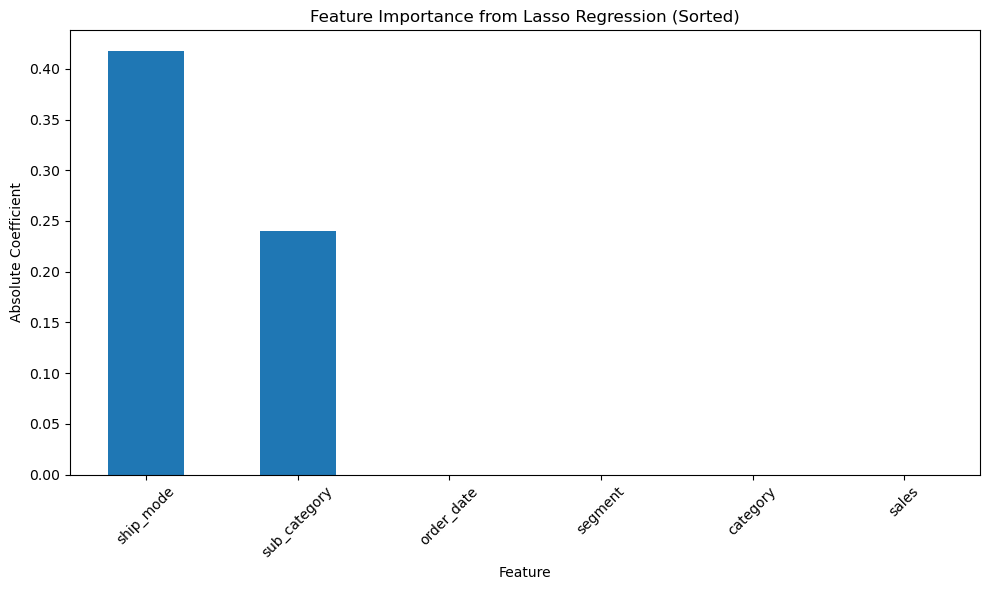

In [24]:
from sklearn.linear_model import Lasso


cluster_data = df.copy()

# Separate features and target variable
X = cluster_data.drop(columns=['cluster_label'])  # Features
y = cluster_data['cluster_label']  # Target variable (assuming 'sales' is the target)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Lasso regression model
lasso = Lasso(alpha=0.1)  # Adjust alpha as per your requirement
lasso.fit(X_scaled, y)

# Get feature importance
feature_importance = pd.Series(lasso.coef_, index=X.columns)

# Print or visualize feature importance for the current cluster
#print(f"Cluster {cluster_label} Feature Importance:")
print(feature_importance)


# Plot feature importance
plt.figure(figsize=(10, 6))

# Take absolute values of feature importance for sorting
abs_feature_importance = feature_importance.abs()
sorted_abs_feature_importance = abs_feature_importance.sort_values(ascending=False)

# Plot sorted absolute feature importance
sorted_abs_feature_importance.plot(kind='bar')
plt.title('Feature Importance from Lasso Regression (Sorted)')
plt.xlabel('Feature')
plt.ylabel('Absolute Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

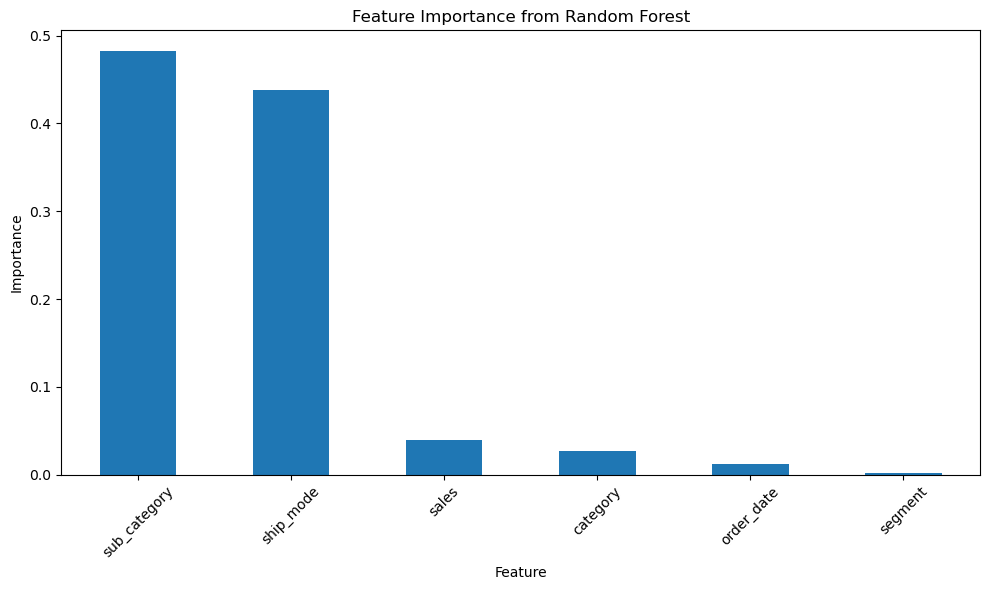

In [25]:
from sklearn.ensemble import RandomForestClassifier  # Assuming you're working with classification

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the parameters as needed
# Train the model
rf.fit(X_scaled, y)
# Get feature importances
feature_importances_rf = pd.Series(rf.feature_importances_, index=X.columns)
# Plot feature importances from Random Forest
plt.figure(figsize=(10, 6))
sorted_feature_importances_rf = feature_importances_rf.sort_values(ascending=False)
sorted_feature_importances_rf.plot(kind='bar')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

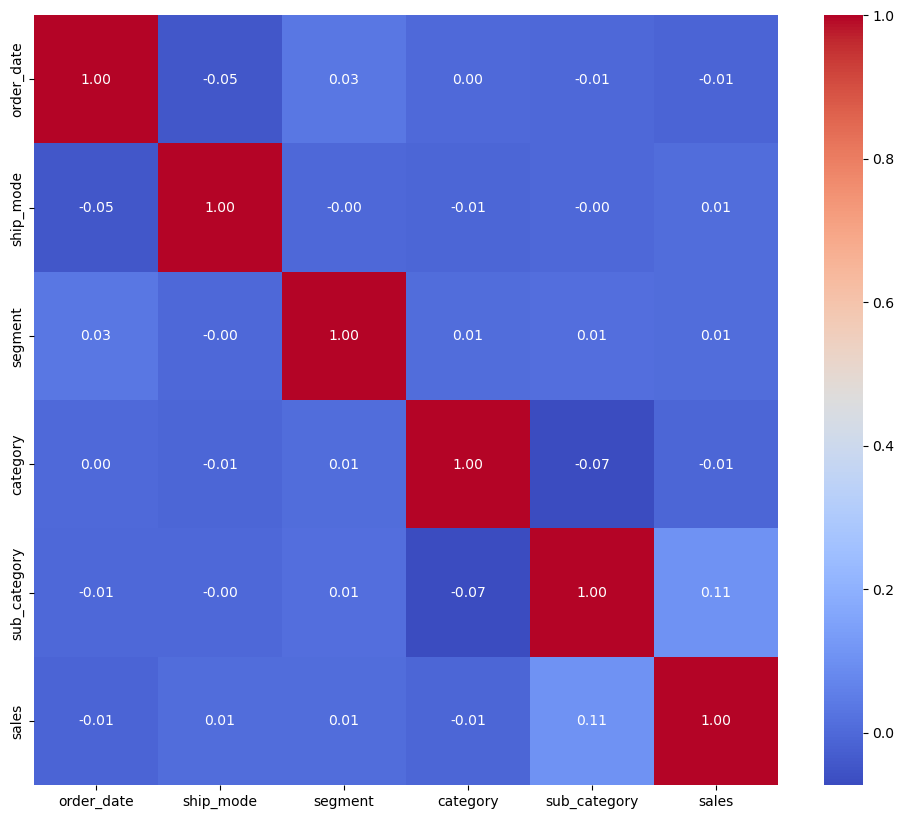

In [26]:
#correlation_matrix = x.corr()
df_cor = df.drop(columns='cluster_label')
correlation_matrix = df_cor.corr()

# You can also create a heatmap for better visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [27]:
dfHist = dfcopy.copy()
dfHist['cluster_label'] = df['cluster_label']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


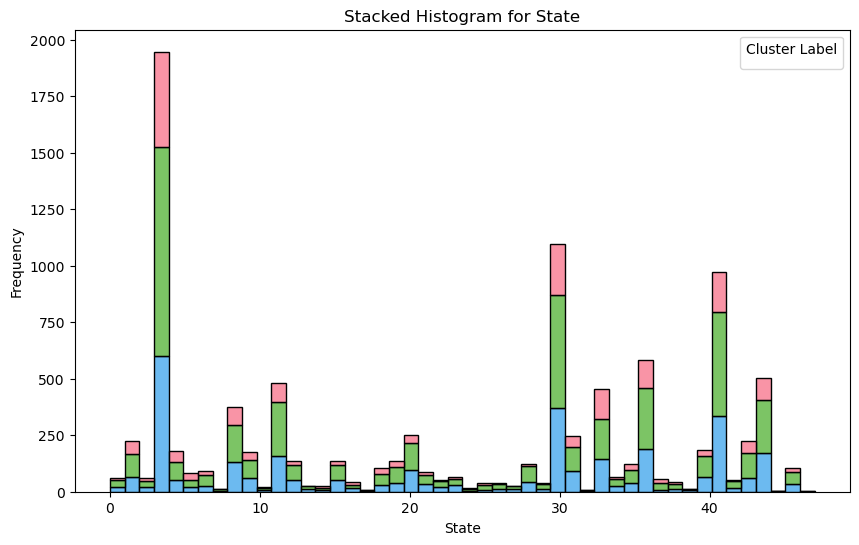

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define your palette
palette = sns.color_palette("husl", n_colors=3)  # You need to define num_clusters

# Rest of your code remains the same
num_states = dfHist['state'].nunique()

# Create a stacked histogram for the 'state' column
plt.figure(figsize=(10, 6))
sns.histplot(data=dfHist, x='state', hue="cluster_label", multiple="stack", bins=num_states, palette=palette)
plt.title('Stacked Histogram for State')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.legend(title='Cluster Label')
plt.grid(False)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


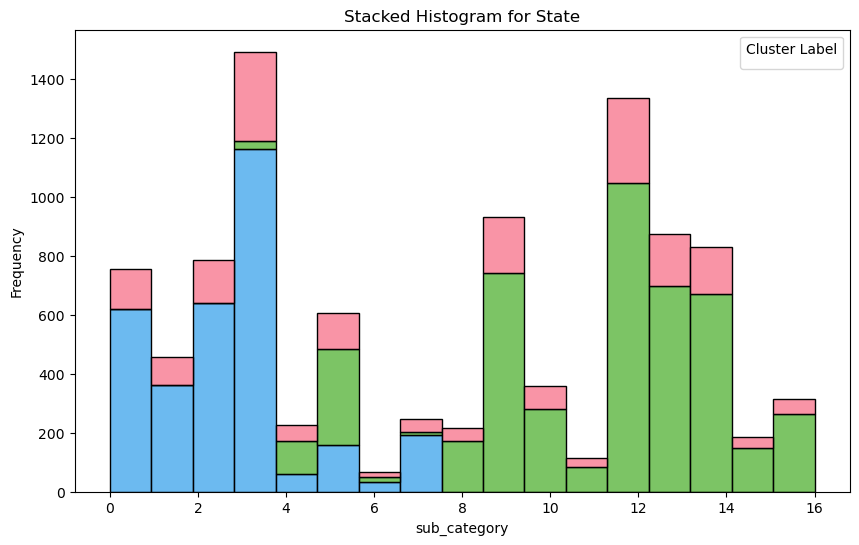

In [31]:
num_states = dfHist['sub_category'].nunique()

# Create a stacked histogram for the 'state' column
plt.figure(figsize=(10, 6))
sns.histplot(data=dfHist, x='sub_category', hue="cluster_label", multiple="stack", bins=num_states, palette=palette)
plt.title('Stacked Histogram for State')
plt.xlabel('sub_category')
plt.ylabel('Frequency')
plt.legend(title='Cluster Label')
plt.grid(False)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


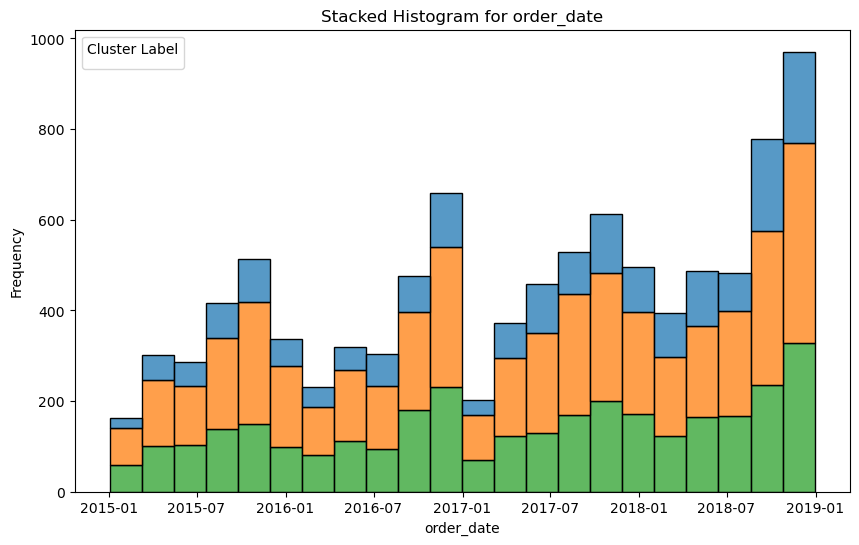

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [ ]:
#prikaz novi
# Define colors for each cluster label
palette = 'tab10'  # You can define a custom palette if needed

# Plot stacked histograms for each column
for column in dfHist.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=dfHist, x=column, hue="cluster_label", multiple="stack", palette=palette)
    plt.title(f'Stacked Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend(title='Cluster Label')
    plt.grid(False)
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


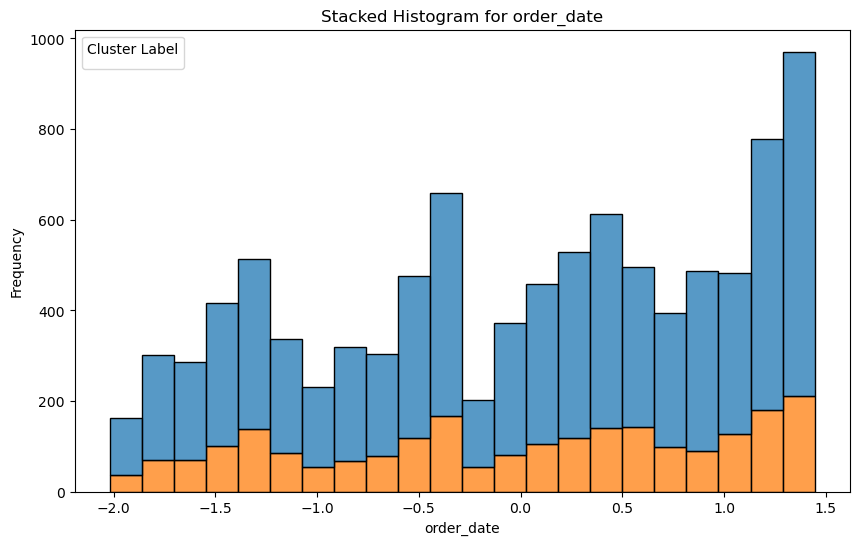

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


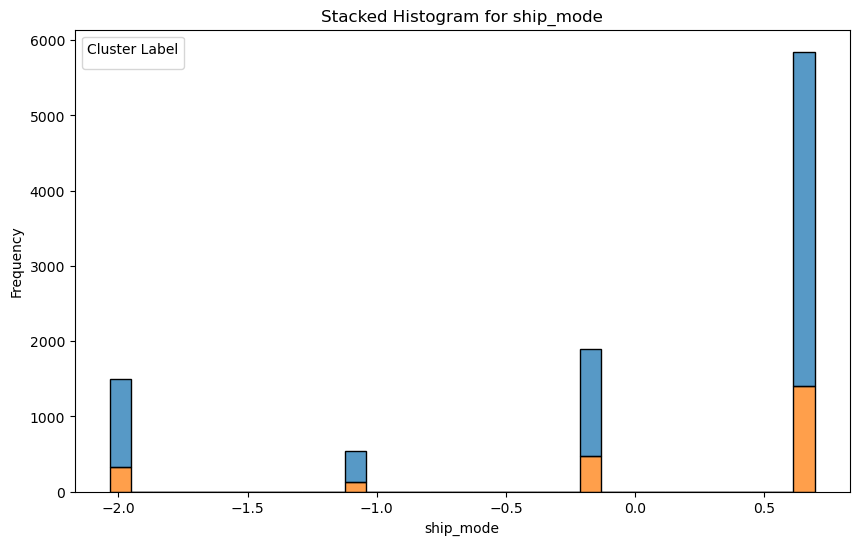

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


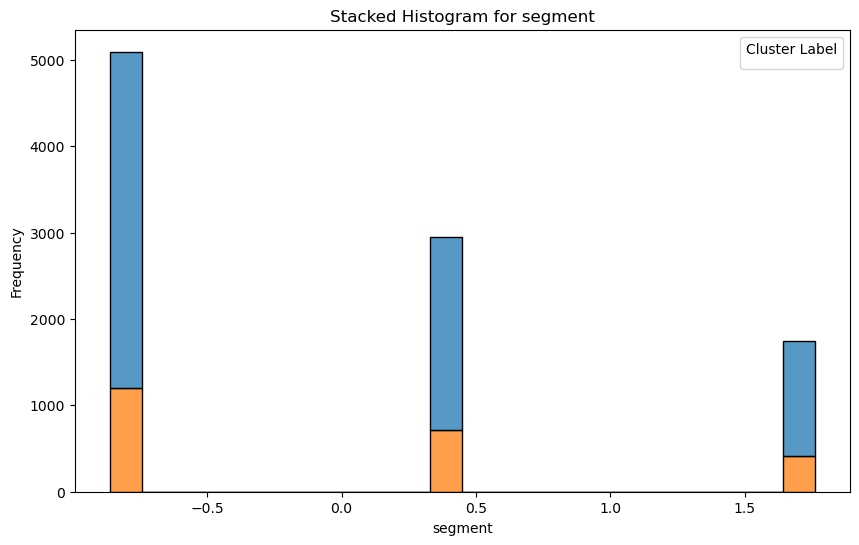

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


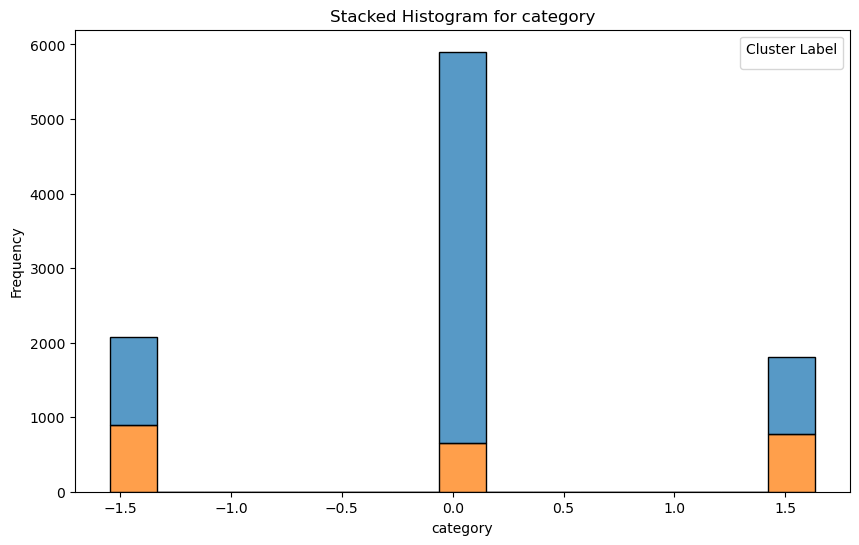

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


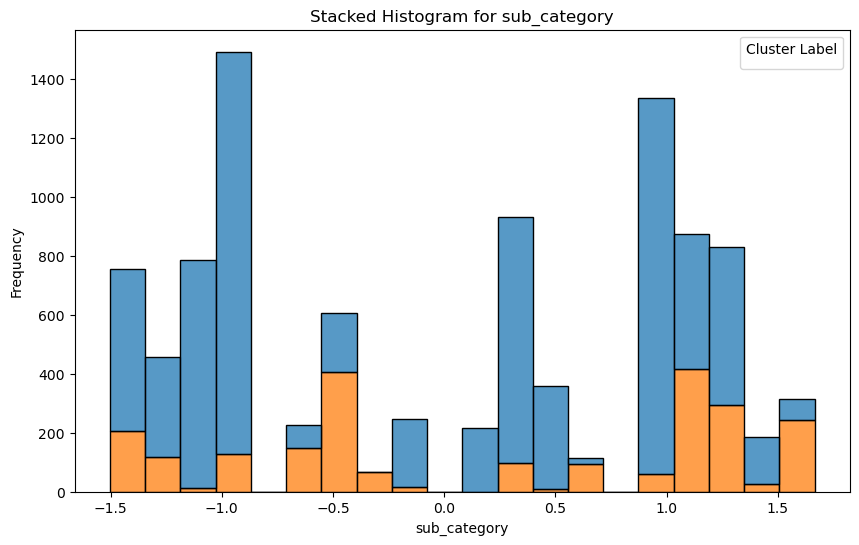

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


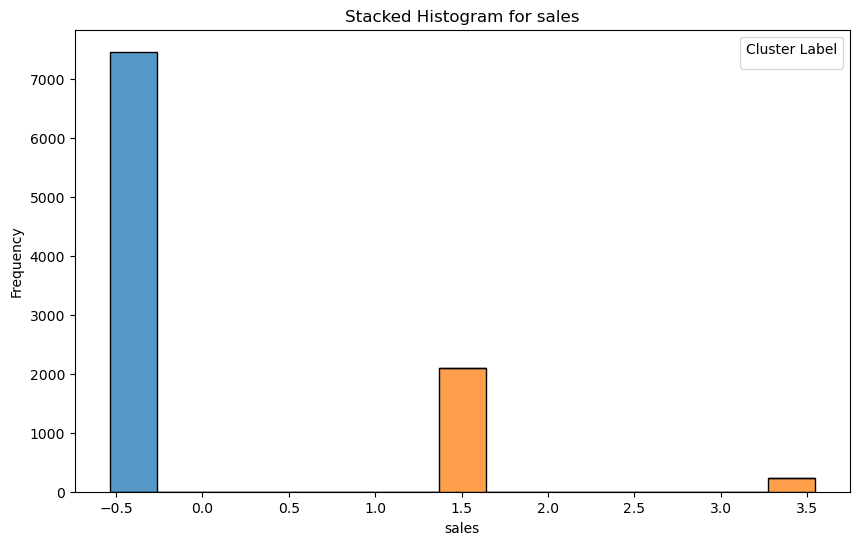

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


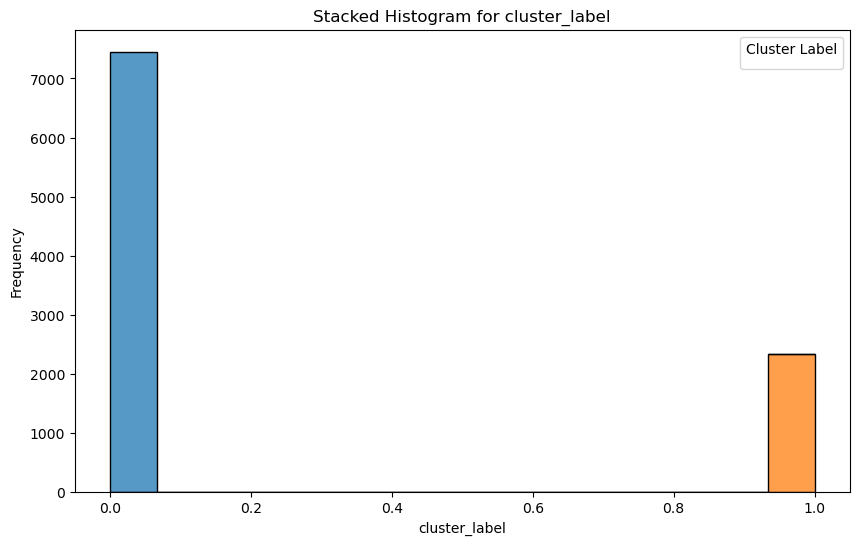

In [194]:
#prikaz novi
# Define colors for each cluster label
palette = 'tab10'  # You can define a custom palette if needed

# Plot stacked histograms for each column
for column in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column, hue="cluster_label", multiple="stack", palette=palette)
    plt.title(f'Stacked Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend(title='Cluster Label')
    plt.grid(False)
    plt.show()

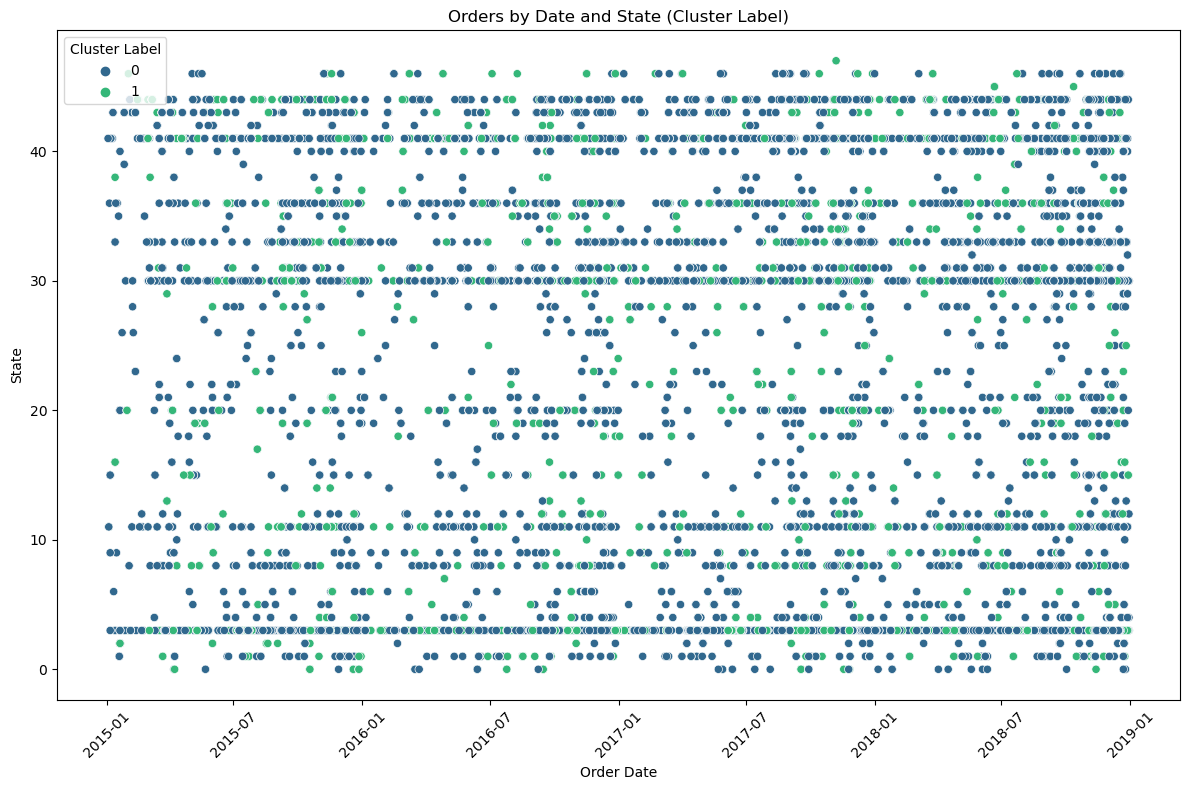

In [206]:
# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=dfHist, x='order_date', y='state', hue='cluster_label', palette='viridis')
plt.title('Orders by Date and State (Cluster Label)')
plt.xlabel('Order Date')
plt.ylabel('State')
plt.legend(title='Cluster Label')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

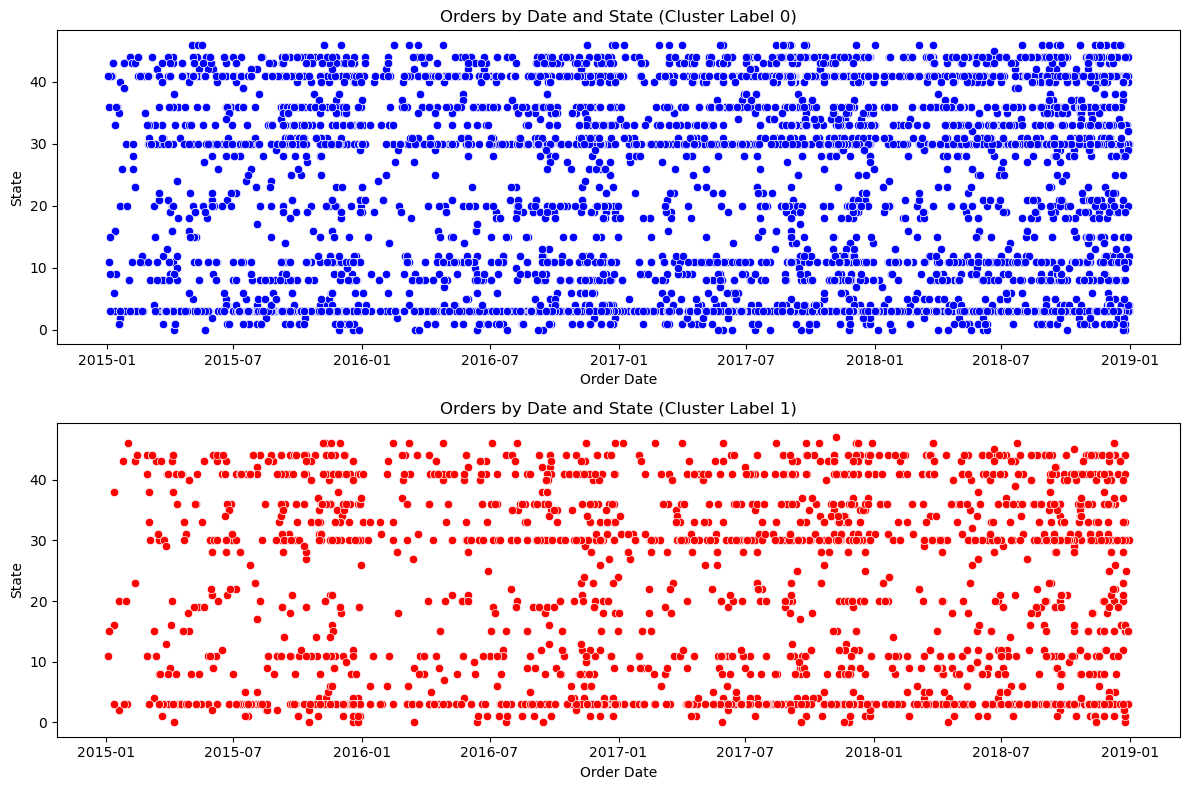

In [207]:
# Create separate scatter plots for each cluster label
plt.figure(figsize=(12, 8))

# Scatter plot for cluster label 0
plt.subplot(2, 1, 1)
sns.scatterplot(data=dfHist[dfHist['cluster_label'] == 0], x='order_date', y='state', color='blue')
plt.title('Orders by Date and State (Cluster Label 0)')
plt.xlabel('Order Date')
plt.ylabel('State')

# Scatter plot for cluster label 1
plt.subplot(2, 1, 2)
sns.scatterplot(data=dfHist[dfHist['cluster_label'] == 1], x='order_date', y='state', color='red')
plt.title('Orders by Date and State (Cluster Label 1)')
plt.xlabel('Order Date')
plt.ylabel('State')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

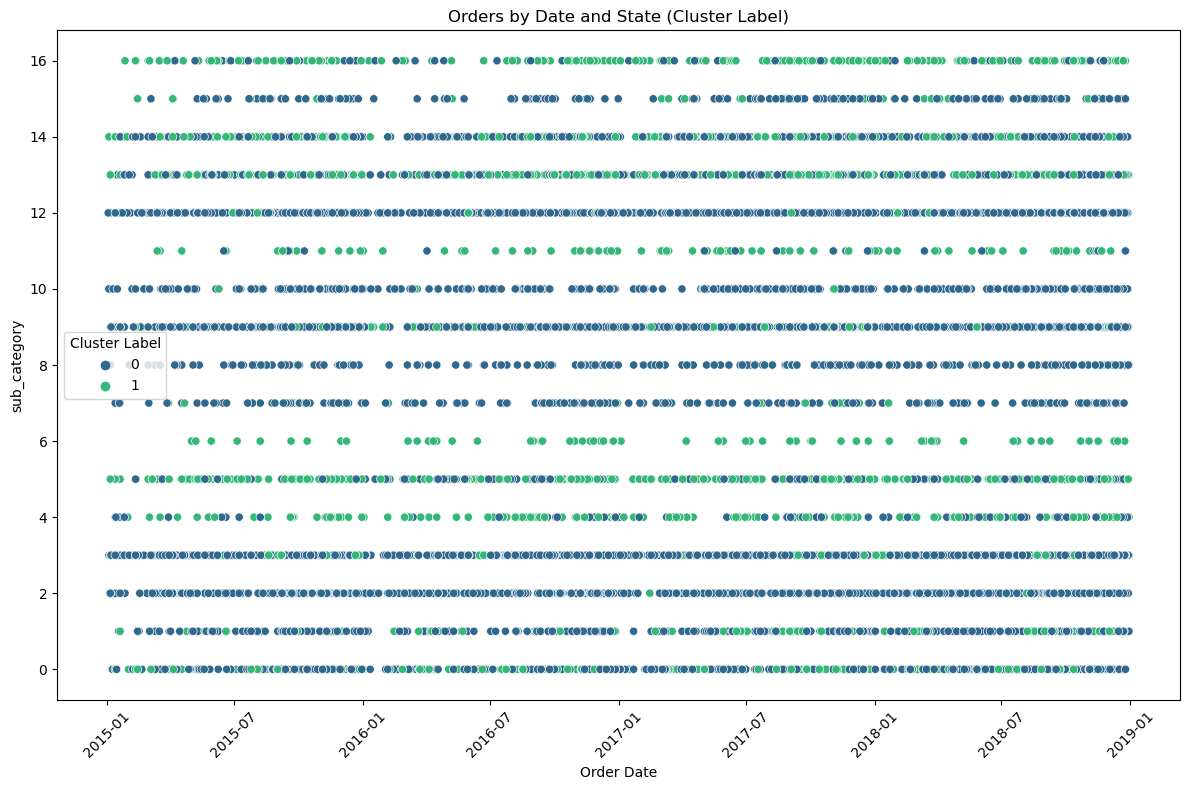

In [208]:
# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=dfHist, x='order_date', y='sub_category', hue='cluster_label', palette='viridis')
plt.title('Orders by Date and State (Cluster Label)')
plt.xlabel('Order Date')
plt.ylabel('sub_category')
plt.legend(title='Cluster Label')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

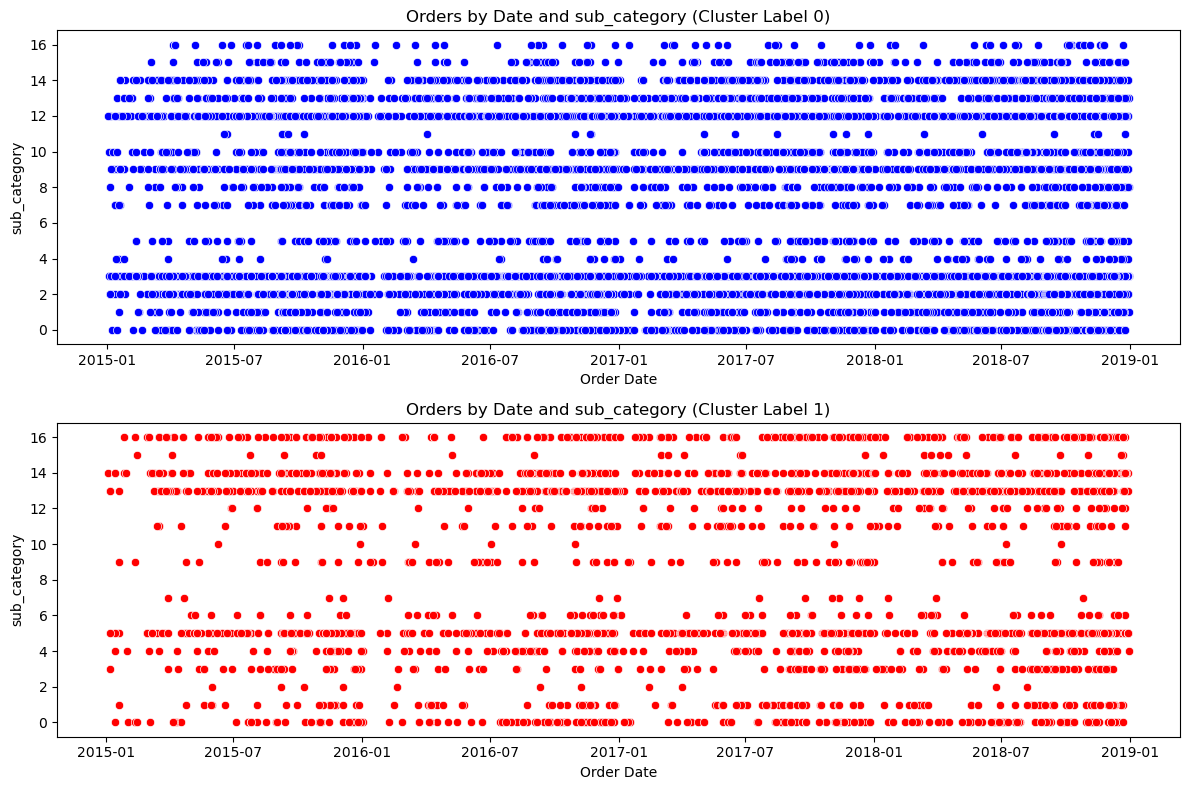

In [211]:
# Create separate scatter plots for each cluster label
plt.figure(figsize=(12, 8))

# Scatter plot for cluster label 0
plt.subplot(2, 1, 1)
sns.scatterplot(data=dfHist[dfHist['cluster_label'] == 0], x='order_date', y='sub_category', color='blue')
plt.title('Orders by Date and sub_category (Cluster Label 0)')
plt.xlabel('Order Date')
plt.ylabel('sub_category')

# Scatter plot for cluster label 1
plt.subplot(2, 1, 2)
sns.scatterplot(data=dfHist[dfHist['cluster_label'] == 1], x='order_date', y='sub_category', color='red')
plt.title('Orders by Date and sub_category (Cluster Label 1)')
plt.xlabel('Order Date')
plt.ylabel('sub_category')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

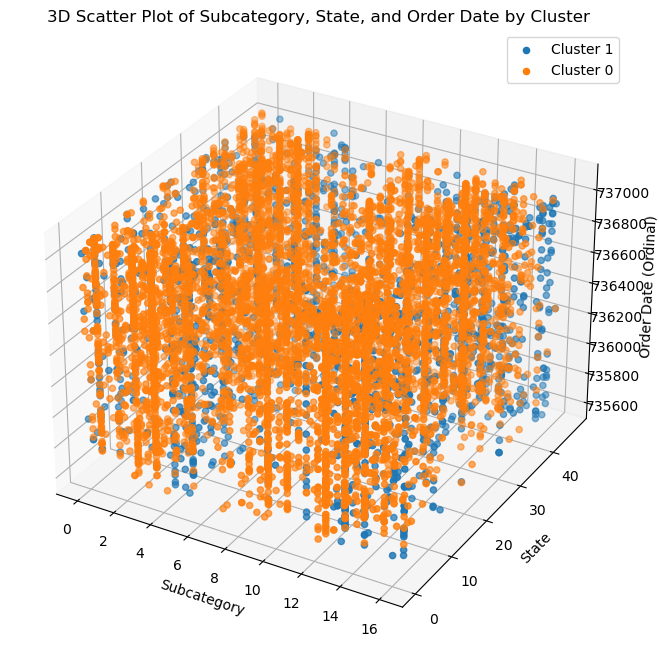

In [223]:
dfHist['order_date_ordinal'] = dfHist['order_date'].apply(lambda x: x.toordinal())

# Create a 3D scatter plot for each cluster
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Iterate over each cluster label
for cluster_label in dfHist['cluster_label'].unique():
    cluster_data = dfHist[dfHist['cluster_label'] == cluster_label]
    ax.scatter(cluster_data['sub_category'], cluster_data['state'], cluster_data['order_date_ordinal'], label=f'Cluster {cluster_label}')

# Set labels and title
ax.set_xlabel('Subcategory')
ax.set_ylabel('State')
ax.set_zlabel('Order Date (Ordinal)')
ax.set_title('3D Scatter Plot of Subcategory, State, and Order Date by Cluster')

# Add legend
ax.legend()

# Show plot
plt.show()